In [1]:
from Model3 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

initial_model_state = copy.deepcopy(model) 

for j in range(300):
    model.step()

There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!


In [3]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data

,Average_Livelihood,Num_household_members,Migrated_households,Migrated_members,Migrated_individuals,Died agents,Child births,Rice agents,Annual crops agents,Low_skilled_agri,Skilled_agri
0,0.000000,10000,0,0,0,0,0,692,321,1742,59
1,0.000000,10000,0,0,0,0,0,692,321,1742,59
2,0.000000,10000,0,0,0,0,0,692,321,1742,59
3,0.000000,10000,0,0,0,0,0,692,321,1742,59
4,0.000000,10000,0,0,0,0,0,692,321,1742,59
...,...,...,...,...,...,...,...,...,...,...,...
320,0.700743,7249,784,3131,290,1137,1800,358,75,797,717
321,0.701145,7249,784,3131,290,1137,1800,358,75,797,717
322,0.701145,7248,784,3131,291,1137,1800,358,75,797,716
323,0.701145,7248,784,3131,291,1137,1800,358,75,797,716


In [4]:
agent_data = model.datacollector.get_agent_vars_dataframe()

agent_savings = agent_data[agent_data['Savings'].notna()]
agent_savings


Crop_type Land_category       Savings  too low income  \
Step AgentID                                                             
1    10001            Rice        medium  2.000000e+07             NaN   
     10002            Rice         small  2.000000e+07             NaN   
     10003            Rice         small  2.000000e+07             NaN   
     10004    Annual crops         large  2.000000e+07             NaN   
     10005    Annual crops        medium  2.000000e+07             NaN   
...                    ...           ...           ...             ...   
300  12742            None          None  3.403979e+09             0.0   
     12743            None          None  6.585259e+09             0.0   
     12744            None          None  3.236433e+09             0.0   
     12745            None          None  1.305453e+09             0.0   
     12746            None          None  3.130666e+09             0.0   

              Number_of_wage_workers  Debt ratio  ww_costs_rice  \
Step AgentID                                                      
1    10001                       NaN         NaN            NaN   
     10002                       NaN         NaN            NaN   
     10003                       NaN         NaN            NaN   
     10004                       NaN         NaN            NaN   
     10005                       NaN         NaN            NaN   
...                              ...         ...            ...   
300  12742                       NaN         NaN            NaN   
     12743                       NaN         NaN            NaN   
     12744                       NaN         NaN            NaN   
     12745                       NaN         NaN            NaN   
     12746                       NaN         NaN            NaN   

              ww_costs_maize  ww_costs_coconut  ww_costs_shrimp  \
Step AgentID                                                      
1    10001               NaN               NaN              NaN   
     10002               NaN               NaN              NaN   
     10003               NaN               NaN              NaN   
     10004               NaN               NaN              NaN   
     10005               NaN               NaN              NaN   
...                      ...               ...              ...   
300  12742               NaN               NaN              NaN   
     12743               NaN               NaN              NaN   
     12744               NaN               NaN              NaN   
     12745               NaN               NaN              NaN   
     12746               NaN               NaN              NaN   

              total_income_rice  total_income_maize  total_income_coconut  \
Step AgentID                                                                
1    10001                  NaN                 NaN                   NaN   
     10002                  NaN                 NaN                   NaN   
     10003                  NaN                 NaN                   NaN   
     10004                  NaN                 NaN                   NaN   
     10005                  NaN                 NaN                   NaN   
...                         ...                 ...                   ...   
300  12742                  NaN                 NaN                   NaN   
     12743                  NaN                 NaN                   NaN   
     12744                  NaN                 NaN                   NaN   
     12745                  NaN                 NaN                   NaN   
     12746                  NaN                 NaN                   NaN   

              total_income_shrimp  yield_rice  yield_maize  yield_coconut  \
Step AgentID                                                                
1    10001                    NaN         NaN          NaN            NaN   
     10002                    NaN         NaN          NaN            NaN   


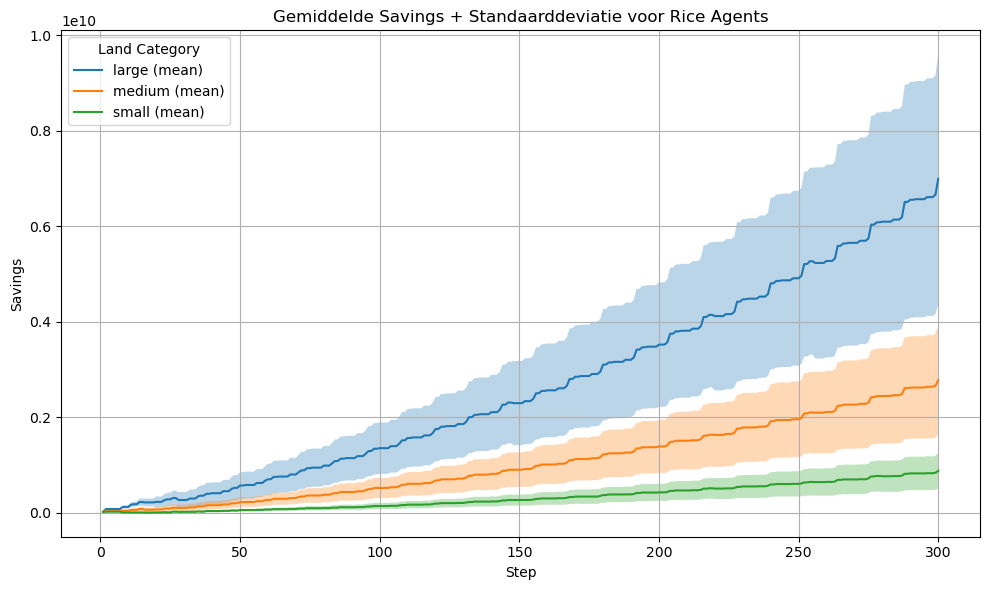

In [5]:
rice_income_data = agent_data
import matplotlib.pyplot as plt
import pandas as pd


rice_income_data = rice_income_data.reset_index()

rice_df = rice_income_data[rice_income_data["Crop_type"] == "Rice"]

mean_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].mean().unstack()
std_savings = rice_df.groupby(["Step", "Land_category"])["Savings"].std().unstack()

plt.figure(figsize=(10,6))
for category in mean_savings.columns:
    mean = mean_savings[category]
    std = std_savings[category]
    
    plt.plot(mean.index, mean.values, label=f"{category} (mean)")
    plt.fill_between(mean.index, mean - std, mean + std, alpha=0.3)

plt.title("Gemiddelde Savings + Standaarddeviatie voor Rice Agents")
plt.xlabel("Step")
plt.ylabel("Savings")
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()




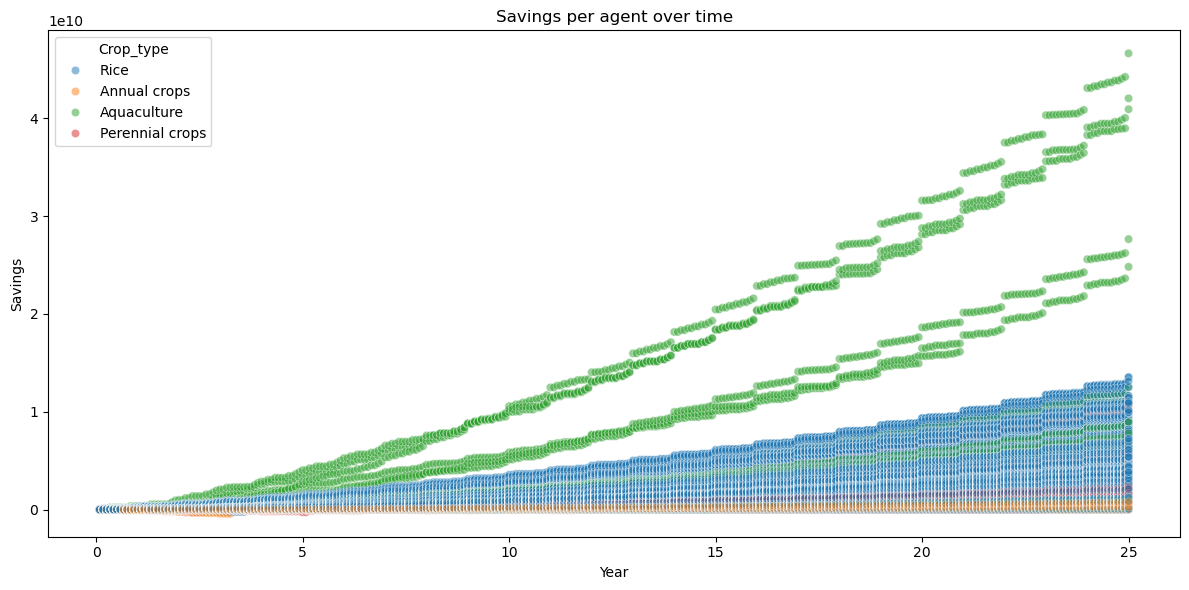

In [6]:
# agent_savings = agent_savings[agent_savings['Crop_type'].notna()]


agent_savings = agent_savings.reset_index() 
agent_savings['Year'] = agent_savings['Step'] / 12

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=agent_savings, x='Year', y='Savings', hue='Crop_type', alpha=0.5)
plt.title("Savings per agent over time")
plt.ylabel("Savings")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

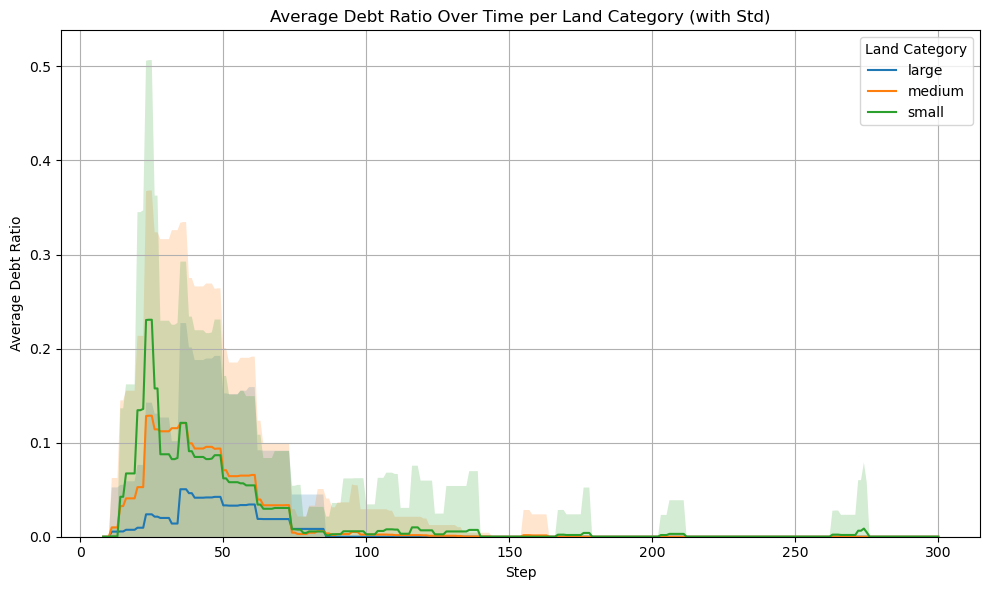

In [7]:
debt_data = agent_data
debt_data = debt_data[debt_data['Debt ratio'].notna()]
import matplotlib.pyplot as plt

# Gemiddelde en standaarddeviatie berekenen
grouped = debt_data.groupby(['Step', 'Land_category'])['Debt ratio']
mean_debt = grouped.mean().unstack()
std_debt = grouped.std().unstack()

# Plot
plt.figure(figsize=(10, 6))

for category in mean_debt.columns:
    plt.plot(mean_debt.index, mean_debt[category], label=category)
    plt.fill_between(
        mean_debt.index,
        mean_debt[category] - std_debt[category],
        mean_debt[category] + std_debt[category],
        alpha=0.2
    )

plt.title("Average Debt Ratio Over Time per Land Category (with Std)")
plt.xlabel("Step")
plt.ylabel("Average Debt Ratio")
plt.ylim(bottom=0)
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
model_data

,Average_Livelihood,Num_household_members,Migrated_households,Migrated_members,Migrated_individuals,Died agents,Child births,Rice agents,Annual crops agents,Low_skilled_agri,Skilled_agri
0,0.000000,10000,0,0,0,0,0,692,321,1742,59
1,0.000000,10000,0,0,0,0,0,692,321,1742,59
2,0.000000,10000,0,0,0,0,0,692,321,1742,59
3,0.000000,10000,0,0,0,0,0,692,321,1742,59
4,0.000000,10000,0,0,0,0,0,692,321,1742,59
...,...,...,...,...,...,...,...,...,...,...,...
320,0.700743,7249,784,3131,290,1137,1800,358,75,797,717
321,0.701145,7249,784,3131,290,1137,1800,358,75,797,717
322,0.701145,7248,784,3131,291,1137,1800,358,75,797,716
323,0.701145,7248,784,3131,291,1137,1800,358,75,797,716


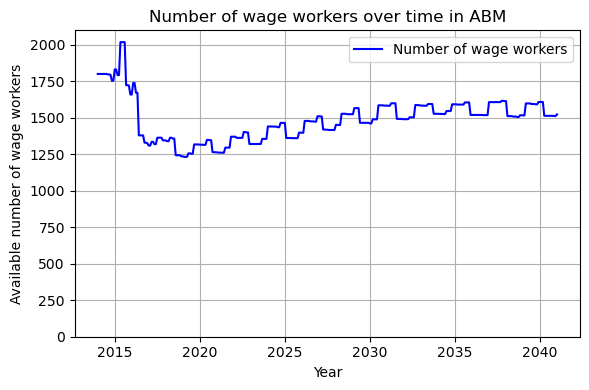

In [9]:

agri_workers = model_data.copy()

# Voeg kolom toe
agri_workers['Total_wage_workers'] = agri_workers['Low_skilled_agri'] + agri_workers['Skilled_agri']

# Maak een jarenreeks van 2014 tot 2039
years = 2014 + (agri_workers.index * (25 / 300))

# Plot
plt.figure(figsize=(6, 4))
plt.plot(years, agri_workers['Total_wage_workers'], label='Number of wage workers', color='blue')
plt.xlabel('Year')
plt.ylabel('Available number of wage workers')
plt.title('Number of wage workers over time in ABM')
plt.ylim(0, 2100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



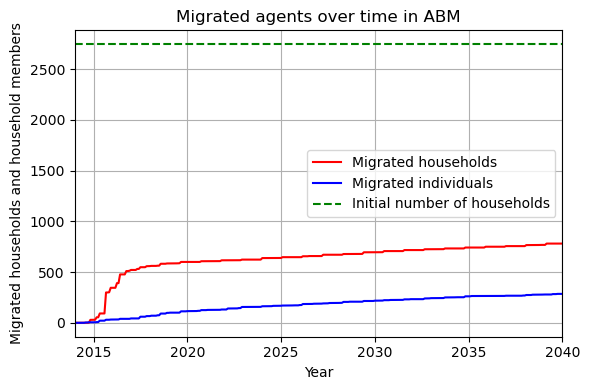

In [10]:
import matplotlib.pyplot as plt

debt_model_data = model_data.copy()
years = debt_model_data.index / 12 + 2014  # 0 wordt 2014, etc.

start_households = model.start_households  

plt.figure(figsize=(6, 4))

plt.plot(years, debt_model_data['Migrated_households'], label='Migrated households', color='red')
plt.plot(years, debt_model_data['Migrated_individuals'], label='Migrated individuals', color='blue')

plt.axhline(y=start_households, color='green', linestyle='--', label='Initial number of households')

plt.xlabel('Year')
plt.ylabel('Migrated households and household members')
plt.title('Migrated agents over time in ABM')
plt.xlim(2014, 2040)  # Beperk x-as tussen 2014 en 2040
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



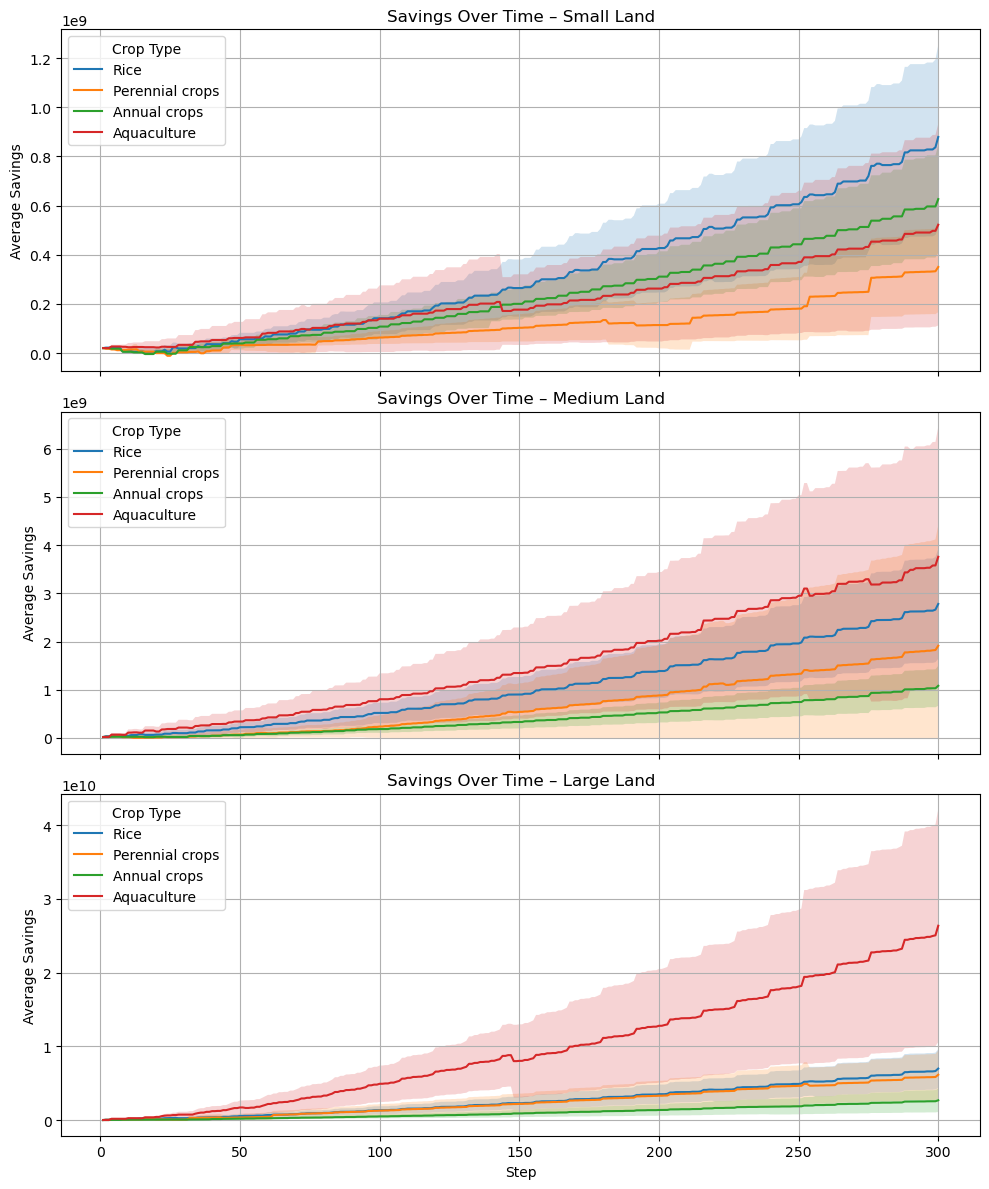

In [11]:
import matplotlib.pyplot as plt
import numpy as np

df_savings = agent_data
df_filtered = df_savings.dropna(subset=['Crop_type', 'Land_category', 'Savings'])

land_categories = ['small', 'medium', 'large']
crop_types = ['Rice', 'Perennial crops', 'Annual crops', 'Aquaculture']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

for i, land in enumerate(land_categories):
    ax = axes[i]
    df_land = df_filtered[df_filtered['Land_category'] == land]
    
    for crop in crop_types:
        df_crop = df_land[df_land['Crop_type'] == crop]
        if df_crop.empty:
            continue

        grouped = df_crop.groupby('Step')['Savings']
        mean = grouped.mean()
        std = grouped.std()

        ax.plot(mean.index, mean.values, label=crop)
        ax.fill_between(
            mean.index,
            np.maximum(0, mean - std),  
            mean + std,
            alpha=0.2
        )
    
    ax.set_title(f"Savings Over Time – {land.capitalize()} Land")
    ax.set_ylabel("Average Savings")
    ax.grid(True)
    ax.legend(title="Crop Type")

axes[-1].set_xlabel("Step")
plt.tight_layout()
plt.show()



In [12]:
ww_data = agent_data
ww_data1 = ww_data[ww_data['Number_of_wage_workers'].notna()]
ww_data1

Crop_type Land_category       Savings  too low income  \
Step AgentID                                                             
2    10001            Rice        medium  2.573309e+07             NaN   
     10002            Rice         small  2.131564e+07             NaN   
     10003            Rice         small  2.247351e+07             NaN   
     10007            Rice         small  1.863862e+07             NaN   
     10010            Rice         small  2.240439e+07             NaN   
...                    ...           ...           ...             ...   
300  11093            Rice         small  9.156151e+08             NaN   
     11094            Rice         small  1.291249e+09             NaN   
     11095            Rice        medium  2.107676e+09             NaN   
     11096            Rice         large  3.821299e+09             NaN   
     11097    Annual crops         small  7.906946e+08             NaN   

              Number_of_wage_workers  Debt ratio  ww_costs_rice  \
Step AgentID                                                      
2    10001                       0.0         NaN   0.000000e+00   
     10002                       8.0         NaN   1.680000e+06   
     10003                       0.0         NaN   0.000000e+00   
     10007                       0.0         NaN   0.000000e+00   
     10010                       0.0         NaN   0.000000e+00   
...                              ...         ...            ...   
300  11093                       6.0         0.0   1.248169e+06   
     11094                       0.0         0.0   0.000000e+00   
     11095                      29.0         0.0   6.032817e+06   
     11096                      53.0         0.0   1.102549e+07   
     11097                       2.0         0.0   1.330000e+06   

              ww_costs_maize  ww_costs_coconut  ww_costs_shrimp  \
Step AgentID                                                      
2    10001               NaN               NaN              NaN   
     10002               NaN               NaN              NaN   
     10003               NaN               NaN              NaN   
     10007               NaN               NaN              NaN   
     10010               NaN               NaN              NaN   
...                      ...               ...              ...   
300  11093      2.717173e+06               NaN              NaN   
     11094      2.717173e+06               NaN              NaN   
     11095               NaN               NaN              NaN   
     11096               NaN               NaN              NaN   
     11097      4.160563e+05               NaN              NaN   

              total_income_rice  total_income_maize  total_income_coconut  \
Step AgentID                                                                
2    10001         1.241976e+07                 NaN                   NaN   
     10002         9.221138e+06                 NaN                   NaN   
     10003         5.816838e+06                 NaN                   NaN   
     10007         6.091285e+06                 NaN                   NaN   
     10010         6.966557e+06                 NaN                   NaN   
...                         ...                 ...                   ...   
300  11093         7.702070e+06        8.308910e+06                   NaN   
     11094         7.900531e+06        8.139895e+06                   NaN   
     11095         2.564483e+07                 NaN                   NaN   
     11096         4.391258e+07                 NaN                   NaN   
     11097         8.287006e+06        1.144740e+07                   NaN   

              total_income_shrimp    yield_rice  yield_maize  yield_coconut  \
Step AgentID                                                                  
2    10001                    NaN   3780.489729          NaN            NaN   
     10002                    NaN   2806.851545          NaN           

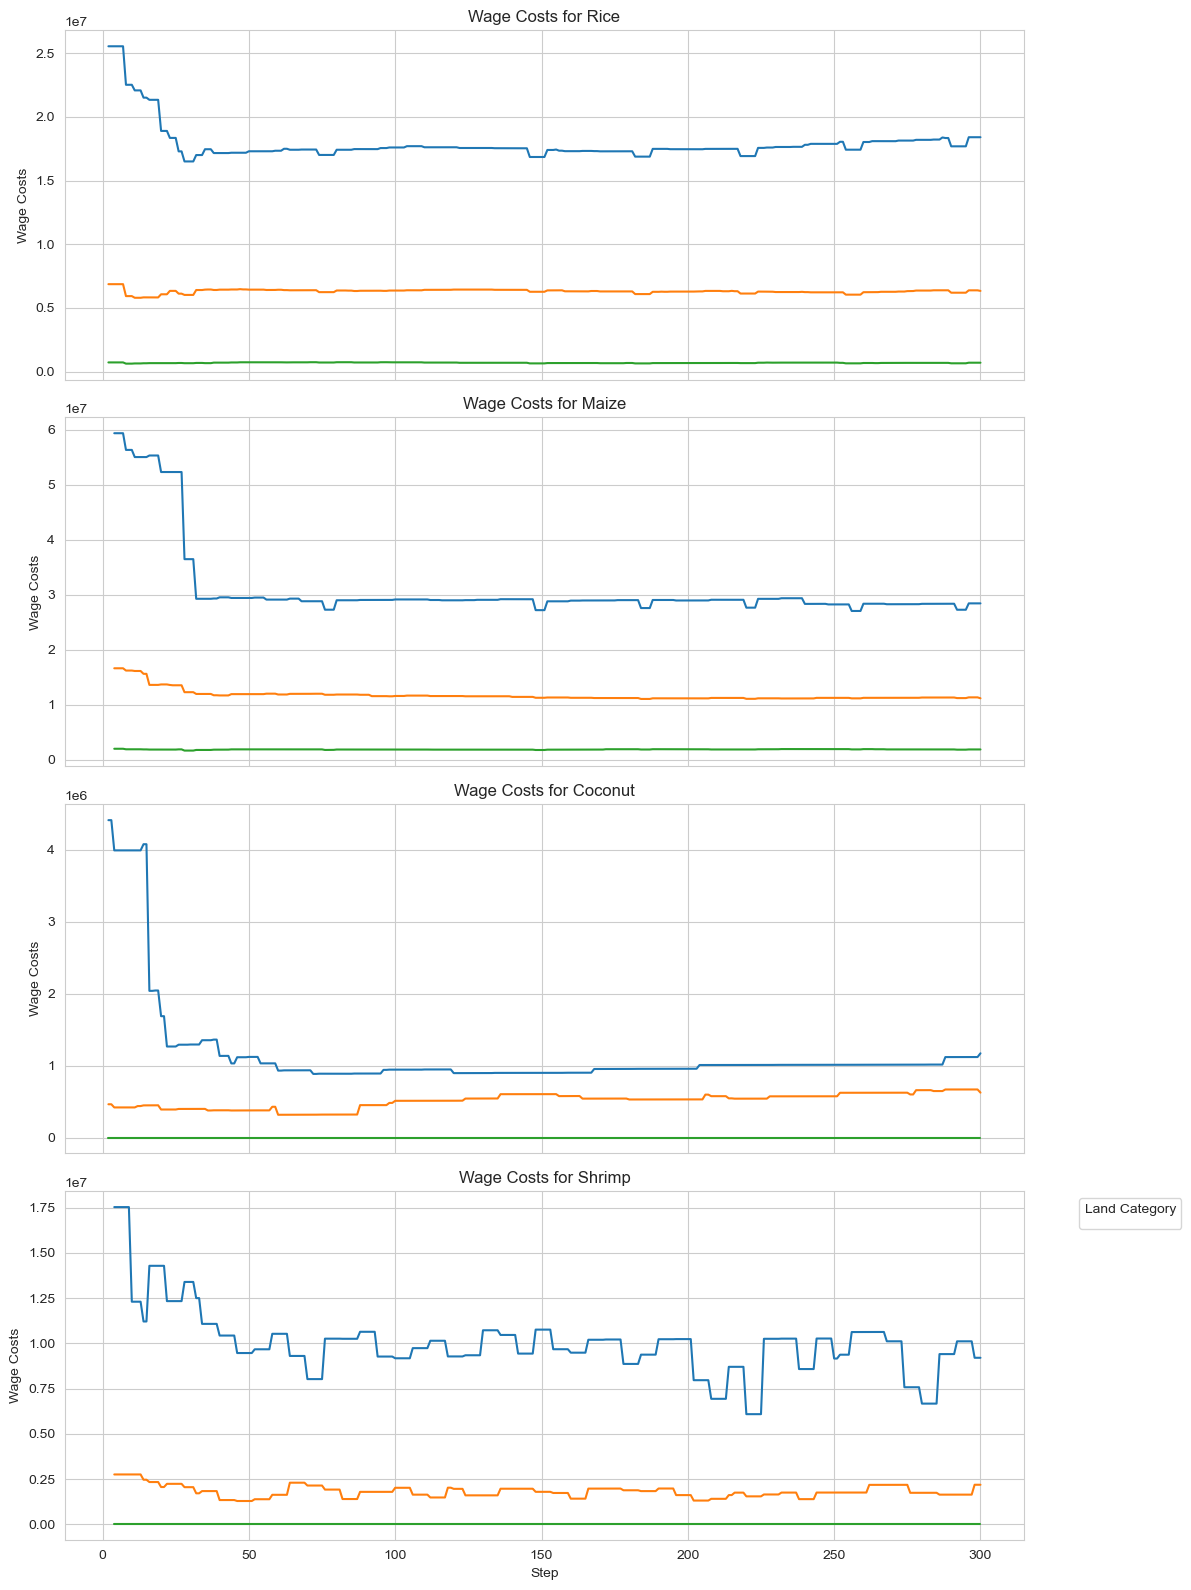

In [13]:

# Zorg dat stijl clean is
sns.set_style("whitegrid")

# Categorieën en bijbehorende kolommen
crops = {
    "Rice": "ww_costs_rice",
    "Maize": "ww_costs_maize",
    "Coconut": "ww_costs_coconut",
    "Shrimp": "ww_costs_shrimp"
}

# Setup voor subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16), sharex=True)

# Voor elke crop: filter, groepeer en plot
for ax, (crop_name, col_name) in zip(axes, crops.items()):
    # Filter: alleen rijen zonder NaN voor deze crop
    ww_data = ww_data1[ww_data1[col_name].notna()]

    # Groeperen: gemiddeld per Step en Land_category
    ww_data = ww_data.groupby(['Step', 'Land_category'])[col_name].mean().reset_index()

    # Plot
    sns.lineplot(
        data=ww_data,
        x='Step',
        y=col_name,
        hue='Land_category',
        ax=ax,
        legend=False  # Zet alleen bij laatste aan
    )

    ax.set_title(f"Wage Costs for {crop_name}")
    ax.set_ylabel("Wage Costs")
    ax.set_xlabel("Step")

# Legenda in de onderste plot
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, labels, title="Land Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


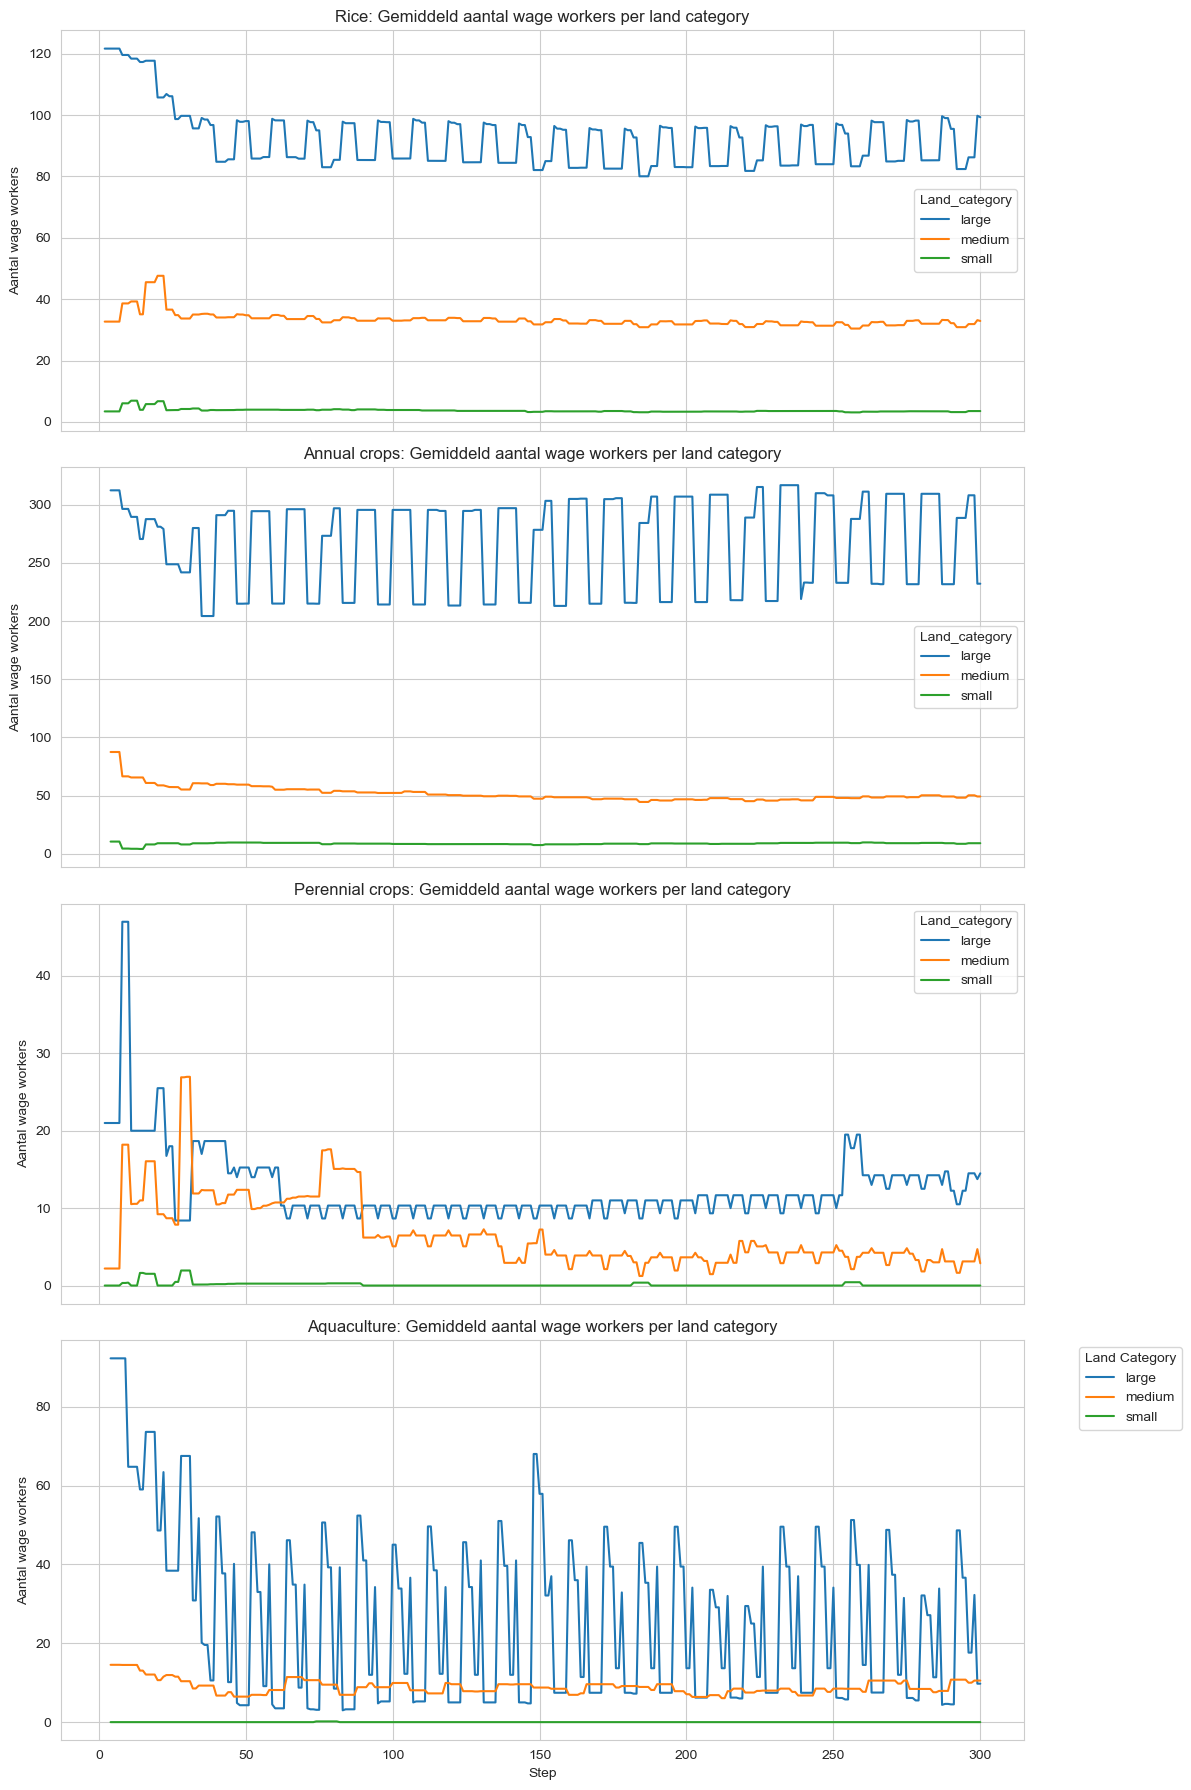

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Zorg voor consistente stijl
sns.set_style("whitegrid")

# Definieer de 4 crops die je wilt plotten
crops = ["Rice", "Annual crops", "Perennial crops", "Aquaculture"]

# Maak een figure met 4 subplots (delen de x-as)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 18), sharex=True)

# Loop over elke crop en bijbehorende as
for ax, crop in zip(axes, crops):
    # Filter de data per crop, en verwijder NaNs
    crop_data = ww_data1[
        (ww_data1["Crop_type"] == crop) &
        (ww_data1["Number_of_wage_workers"].notna()) &
        (ww_data1["Land_category"].notna())
    ].copy()

    # Groepeer per Step & Land_category en neem gemiddelde
    grouped = crop_data.groupby(["Step", "Land_category"])["Number_of_wage_workers"].mean().reset_index()

    # Maak de plot
    sns.lineplot(
        data=grouped,
        x="Step",
        y="Number_of_wage_workers",
        hue="Land_category",
        ax=ax
    )

    # Titels en labels
    ax.set_title(f"{crop}: Gemiddeld aantal wage workers per land category")
    ax.set_ylabel("Aantal wage workers")

# Legenda bij onderste plot
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, labels, title="Land Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# X-label alleen onderaan
axes[-1].set_xlabel("Step")

plt.tight_layout()
plt.show()


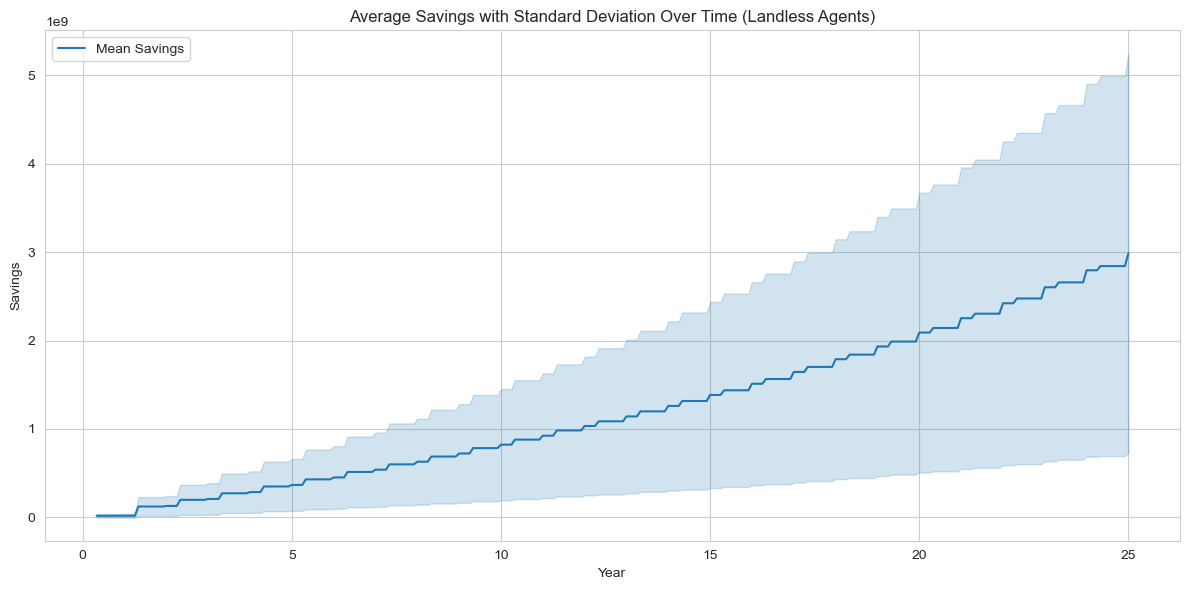

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter landless agents
landless_savings = agent_data[agent_data['too low income'].notna()].reset_index()
landless_savings['Year'] = landless_savings['Step'] / 12


# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=landless_savings,
    x="Year",
    y="Savings",
    errorbar='sd',  
    estimator="mean",
    label="Mean Savings",
    ci="sd"  
)

plt.title("Average Savings with Standard Deviation Over Time (Landless Agents)")
plt.xlabel("Year")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()



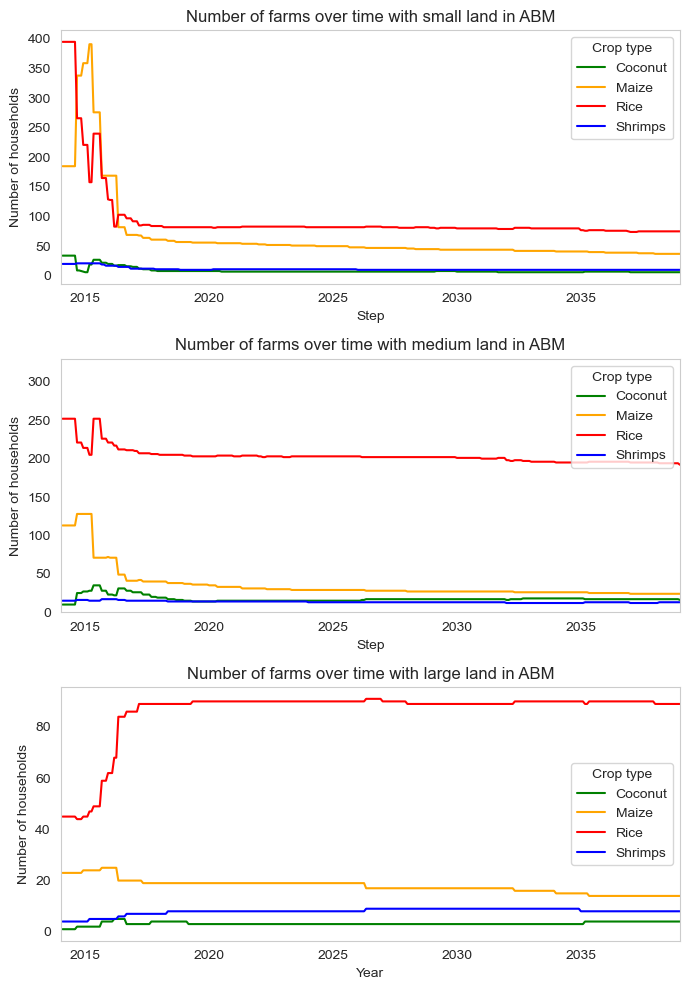

In [22]:
agent_data_crops_per_land = agent_data[agent_data['Crop_type'].notna()]
agent_data_crops_per_land

import matplotlib.pyplot as plt

crop_colors = {
    "Maize": "orange",       
    "Rice": "red",
    "Coconut": "green",     
    "Shrimps": "blue"       
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

start_year = 2014
end_year = start_year + 25

for i, category in enumerate(['small', 'medium', 'large']):
    subsets = agent_data_crops_per_land[agent_data_crops_per_land["Land_category"] == category]
    if len(subsets) > 0:
        subsets = subsets.reset_index()
        subsets = subsets.groupby(['Step', "Crop_type"]).size().reset_index(name="count")
        subsets = subsets.pivot(index="Step", columns="Crop_type", values="count").fillna(0)

        # Crop namen aanpassen
        rename_dict = {
            "Annual crops": "Maize",
            "Perennial crops": "Coconut",
            "Aquaculture": "Shrimps"
        }
        subsets.rename(columns=rename_dict, inplace=True)

        # Tijd omzetten naar jaartallen
        subsets.index = start_year + subsets.index / 12

        # Gewenste volgorde van crops
        ordered_labels = ['Coconut', 'Maize', 'Rice', 'Shrimps']
        plot_columns = [label for label in ordered_labels if label in subsets.columns]
        color_list = [crop_colors[label] for label in plot_columns]

        # Plot in gewenste volgorde
        subsets[plot_columns].plot(ax=axes[i], color=color_list)

        # Titel, labels, limieten
        axes[i].set_title(f"Number of farms over time with {category} land in ABM")
        axes[i].set_ylabel("Number of households")
        axes[i].set_xlim(start_year, end_year)
        axes[i].grid(False)

        if i == 1:
            axes[i].set_ylim(0, 330)  # Y-as limiet op middelste subplot

        # Legenda in juiste volgorde
        handles, _ = axes[i].get_legend_handles_labels()
        ordered_handles = [handles[plot_columns.index(label)] for label in plot_columns]
        axes[i].legend(ordered_handles, plot_columns, title="Crop type")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()



In [17]:
agent_data_crops_per_land

Crop_type Land_category       Savings  too low income  \
Step AgentID                                                             
1    10001            Rice        medium  2.000000e+07             NaN   
     10002            Rice         small  2.000000e+07             NaN   
     10003            Rice         small  2.000000e+07             NaN   
     10004    Annual crops         large  2.000000e+07             NaN   
     10005    Annual crops        medium  2.000000e+07             NaN   
...                    ...           ...           ...             ...   
300  11093            Rice         small  9.156151e+08             NaN   
     11094            Rice         small  1.291249e+09             NaN   
     11095            Rice        medium  2.107676e+09             NaN   
     11096            Rice         small  3.821299e+09             NaN   
     11097    Annual crops         small  7.906946e+08             NaN   

              Number_of_wage_workers  Debt ratio  ww_costs_rice  \
Step AgentID                                                      
1    10001                       NaN         NaN            NaN   
     10002                       NaN         NaN            NaN   
     10003                       NaN         NaN            NaN   
     10004                       NaN         NaN            NaN   
     10005                       NaN         NaN            NaN   
...                              ...         ...            ...   
300  11093                       6.0         0.0   1.248169e+06   
     11094                       0.0         0.0   0.000000e+00   
     11095                      29.0         0.0   6.032817e+06   
     11096                      53.0         0.0   1.102549e+07   
     11097                       2.0         0.0   1.330000e+06   

              ww_costs_maize  ww_costs_coconut  ww_costs_shrimp  \
Step AgentID                                                      
1    10001               NaN               NaN              NaN   
     10002               NaN               NaN              NaN   
     10003               NaN               NaN              NaN   
     10004               NaN               NaN              NaN   
     10005               NaN               NaN              NaN   
...                      ...               ...              ...   
300  11093      2.717173e+06               NaN              NaN   
     11094      2.717173e+06               NaN              NaN   
     11095               NaN               NaN              NaN   
     11096               NaN               NaN              NaN   
     11097      4.160563e+05               NaN              NaN   

              total_income_rice  total_income_maize  total_income_coconut  \
Step AgentID                                                                
1    10001                  NaN                 NaN                   NaN   
     10002                  NaN                 NaN                   NaN   
     10003                  NaN                 NaN                   NaN   
     10004                  NaN                 NaN                   NaN   
     10005                  NaN                 NaN                   NaN   
...                         ...                 ...                   ...   
300  11093         7.702070e+06        8.308910e+06                   NaN   
     11094         7.900531e+06        8.139895e+06                   NaN   
     11095         2.564483e+07                 NaN                   NaN   
     11096         4.391258e+07                 NaN                   NaN   
     11097         8.287006e+06        1.144740e+07                   NaN   

              total_income_shrimp    yield_rice  yield_maize  yield_coconut  \
Step AgentID                                                                  
1    10001                    NaN           NaN          NaN            NaN   
     10002                    NaN           NaN          NaN           

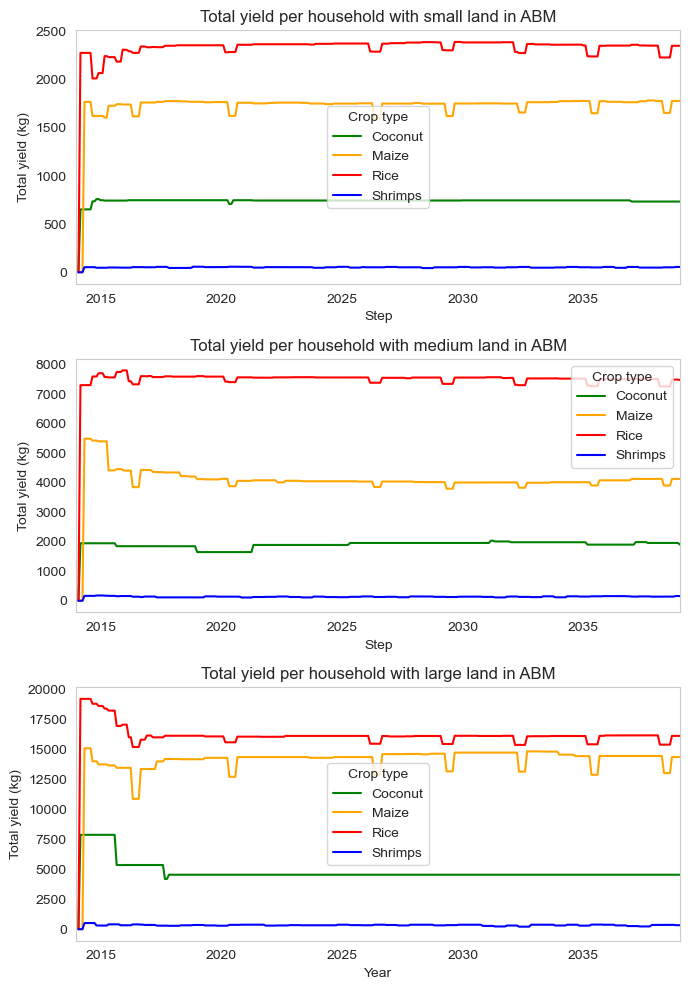

In [19]:
import matplotlib.pyplot as plt

# Filter alleen de rijen met een geldige Crop_type
agent_data_income = agent_data[agent_data['Crop_type'].notna()]

# Definieer kleuren voor elke crop
crop_colors = {
    "Maize": "orange",       
    "Rice": "red",
    "Coconut": "green",     
    "Shrimps": "blue"       
}

# Teken subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 10))

start_year = 2014
end_year = start_year + 25

for i, category in enumerate(['small', 'medium', 'large']):
    subset = agent_data_income[agent_data_income["Land_category"] == category]

    if len(subset) > 0:
        subset = subset.reset_index()

        # Vervang Crop_type-namen
        subset['Crop_type'] = subset['Crop_type'].replace({
            "Annual crops": "Maize",
            "Perennial crops": "Coconut",
            "Aquaculture": "Shrimps"
        })

        # Voeg gewasinkomens samen in één kolom
        crop_income_columns = {
            "Rice": "yield_rice",
            "Maize": "yield_maize",
            "Coconut": "yield_coconut",
            "Shrimps": "yield_shrimp"
        }

        income_data = []
        for crop, income_col in crop_income_columns.items():
            crop_subset = subset[subset['Crop_type'] == crop].copy()
            crop_subset = crop_subset[['Step', income_col]].groupby('Step').mean()
            crop_subset.rename(columns={income_col: crop}, inplace=True)
            income_data.append(crop_subset)

        # Combineer alles op Step-index
        combined = pd.concat(income_data, axis=1).fillna(0)
        combined.index = start_year + combined.index / 12  # stap per maand → jaren

        # Gewenste volgorde voor crops
        ordered_labels = ['Coconut', 'Maize', 'Rice', 'Shrimps']
        plot_columns = [label for label in ordered_labels if label in combined.columns]
        color_list = [crop_colors[label] for label in plot_columns]

        combined[plot_columns].plot(ax=axes[i], color=color_list)

        # Plot instellingen
        axes[i].set_title(f"Total yield per household with {category} land in ABM")
        axes[i].set_ylabel("Total yield (kg)")
        axes[i].set_xlim(start_year, end_year)
        axes[i].grid(False)

          # Pas aan indien nodig

        # Legenda geforceerd in juiste volgorde
        handles, _ = axes[i].get_legend_handles_labels()
        ordered_handles = [handles[plot_columns.index(label)] for label in plot_columns]
        axes[i].legend(ordered_handles, plot_columns, title="Crop type")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.grid(False)
plt.show()


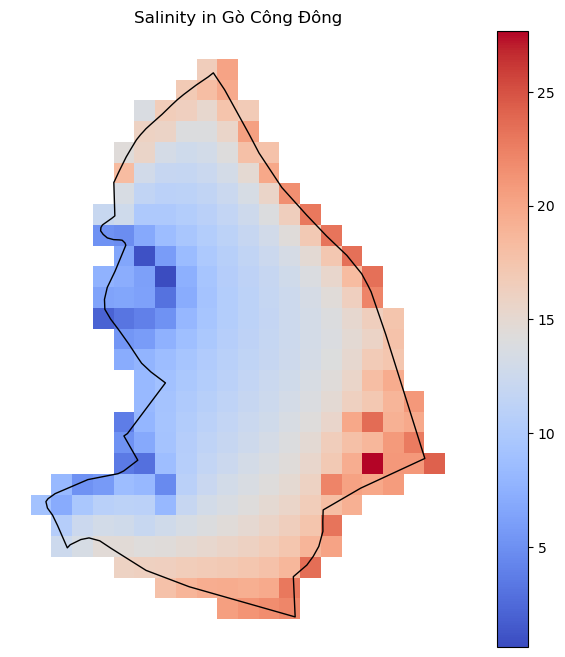

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

Aantal nodes per crop_type:
Annual crops: 321
Aquaculture: 39
Rice: 692
Perennial crops: 45
Unknown: 0
Aantal nodes per crop_type:
Annual crops: 75
Aquaculture: 31
Rice: 356
Perennial crops: 26
Unknown: 0


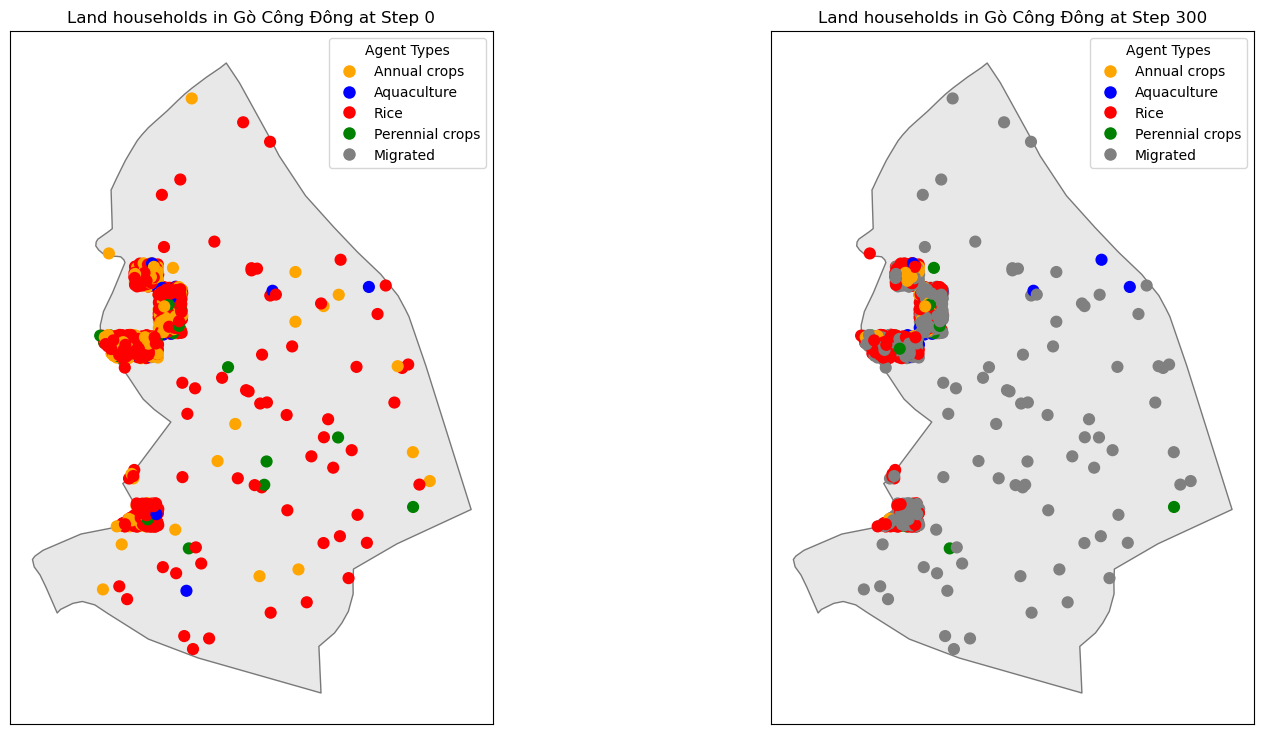

In [ ]:
from Model3 import Large_land_households, Middle_land_households, Small_land_households
from collections import Counter

def plot_network(ax, model):
    ax.clear()

    # Map node_id to agent
    node_to_agent = {agent.node_id: agent for agent in model.agents if isinstance(agent, (Large_land_households, Middle_land_households, Small_land_households))}
    
    # Tellen crop_types
    crop_counts = Counter()
    for agent in node_to_agent.values():
        crop = agent.crop_type
        if crop is not None:
            crop_counts[crop] += 1
        else:
            crop_counts['Unknown'] += 1

    print("Aantal nodes per crop_type:")
    for crop_type in ["Annual crops", "Aquaculture", "Rice", "Perennial crops", "Unknown"]:
        print(f"{crop_type}: {crop_counts.get(crop_type, 0)}")

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')

    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.crop_type == "Annual crops":
                colors_to_draw.append('orange')
            elif agent.crop_type == "Aquaculture":
                colors_to_draw.append('blue')
            elif agent.crop_type == "Rice":
                colors_to_draw.append('red')
            elif agent.crop_type == "Perennial crops":
                colors_to_draw.append('green')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent


    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Annual crops')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Aquaculture')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Rice')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Perennial crops')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Migrated')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Land households in {model.district} at Step {model.steps}", fontsize=12)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()

## 10 RUNS VOOR RESULTS


In [ ]:
import copy
import pandas as pd
import random
import numpy as np

all_agent_data = []
all_model_data = []

for run in range(10):
    seed_value = run 
    random.seed(seed_value)
    np.random.seed(seed_value)

    model = RiverDeltaModel(seed=seed_value)  

    for j in range(300):
        model.step()

    agent_data_run = model.datacollector.get_agent_vars_dataframe()
    agent_data_run["Run"] = run
    all_agent_data.append(agent_data_run.reset_index())

    
    model_data_run = model.datacollector.get_model_vars_dataframe().copy()
    model_data_run['Run'] = run
    all_model_data.append(model_data_run.reset_index())


There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
There are 0 agents unassigned!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!
shock is happening!!


KeyboardInterrupt: 

In [ ]:
all_model_data

[     index  Average_Livelihood  Num_household_members  Migrated_households  \
 0        0            0.000000                   1000                    0   
 1        1            0.000000                   1000                    0   
 2        2            0.000000                   1000                    0   
 3        3            0.000000                   1000                    0   
 4        4            0.000000                   1000                    0   
 ..     ...                 ...                    ...                  ...   
 296    296            0.735108                    757                   81   
 297    297            0.735108                    757                   81   
 298    298            0.735108                    757                   81   
 299    299            0.735108                    757                   81   
 300    300            0.735108                    751                   81   
 
      Migrated_members  Migrated_individuals  Died

In [ ]:
agent_data_all = pd.concat(all_agent_data, ignore_index=True)
agent_data_crops = agent_data_all[agent_data_all['Crop_type'].notna()]

grouped = (
    agent_data_crops
    .groupby(['Run', 'Step', 'Crop_type', 'Land_category'])
    .size()
    .reset_index(name='count')
)

mean_std = (
    grouped
    .groupby(['Step', 'Crop_type', 'Land_category'])['count']
    .agg(['mean', 'std'])
    .reset_index()
)

model_data_all = pd.concat(all_model_data, ignore_index=True)

grouped_model = (
    model_data_all
    .groupby(['index'])[['Migrated_households', 'Migrated_individuals']]
    .agg(['mean', 'std'])
)

grouped_model.columns = ['_'.join(col).strip() for col in grouped_model.columns.values]
grouped_model = grouped_model.reset_index()
grouped_model['Year'] = grouped_model['index'] / 12  

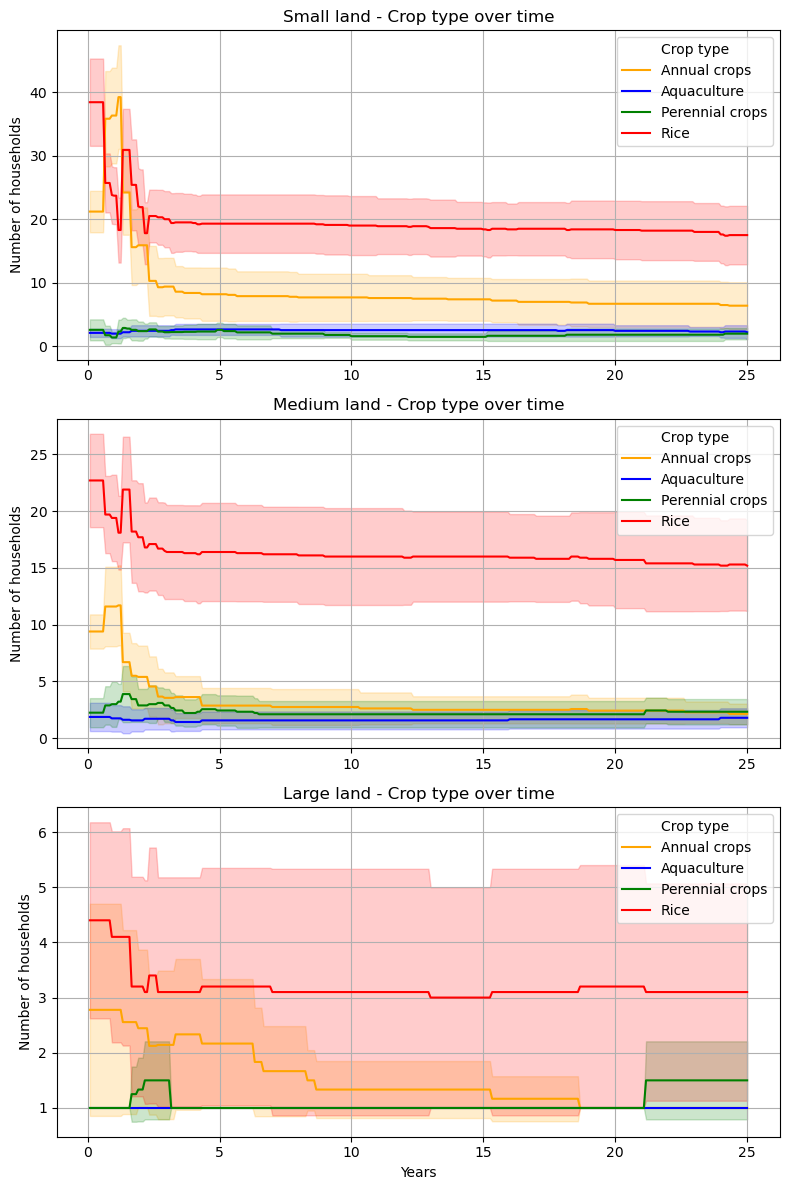

In [ ]:
import matplotlib.pyplot as plt

crop_colors = {
    "Annual crops": "orange",
    "Rice": "red",
    "Perennial crops": "green",
    "Aquaculture": "blue"
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
land_categories = ['small', 'medium', 'large']

for i, category in enumerate(land_categories):
    subset = mean_std[mean_std['Land_category'] == category]

    for crop in subset['Crop_type'].unique():
        crop_data = subset[subset['Crop_type'] == crop]
        steps = crop_data['Step'] / 12 

        axes[i].plot(steps, crop_data['mean'], label=crop, color=crop_colors.get(crop, None))
        axes[i].fill_between(
            steps,
            crop_data['mean'] - crop_data['std'],
            crop_data['mean'] + crop_data['std'],
            color=crop_colors.get(crop, None),
            alpha=0.2
        )

    axes[i].set_title(f"{category.capitalize()} land - Crop type over time")
    axes[i].set_ylabel("Number of households")
    axes[i].legend(title="Crop type")
    axes[i].grid(True)

axes[-1].set_xlabel("Years")
plt.tight_layout()
plt.show()


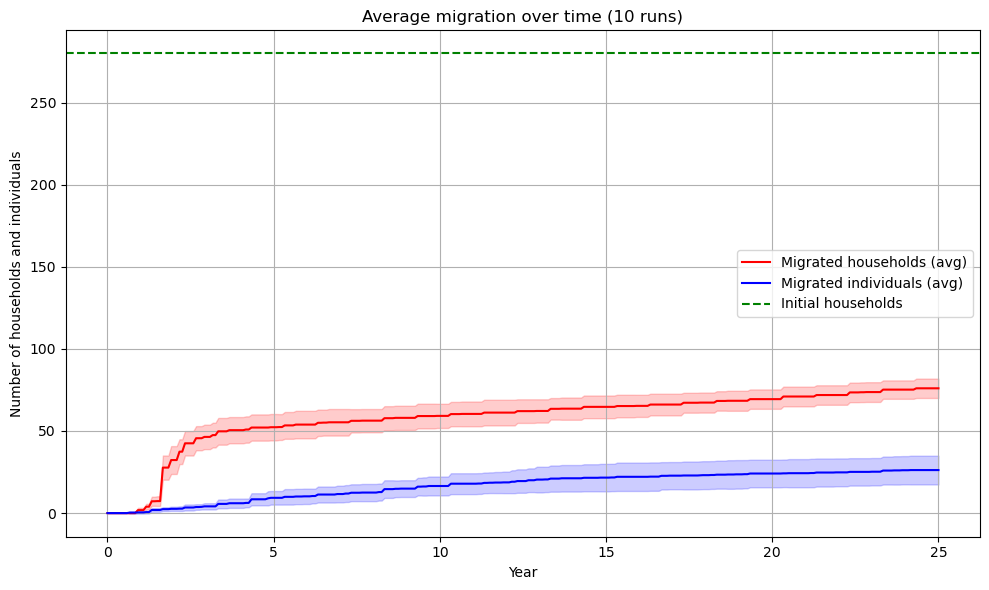

In [ ]:
migrated_data = grouped_model

start_households = model.start_households  

plt.figure(figsize=(10, 6))

plt.plot(migrated_data['Year'], migrated_data['Migrated_households_mean'], label='Migrated households (avg)', color='red')
plt.fill_between(
    migrated_data['Year'],
    migrated_data['Migrated_households_mean'] - migrated_data['Migrated_households_std'],
    migrated_data['Migrated_households_mean'] + migrated_data['Migrated_households_std'],
    color='red',
    alpha=0.2
)

plt.plot(migrated_data['Year'], migrated_data['Migrated_individuals_mean'], label='Migrated individuals (avg)', color='blue')
plt.fill_between(
    migrated_data['Year'],
    migrated_data['Migrated_individuals_mean'] - migrated_data['Migrated_individuals_std'],
    migrated_data['Migrated_individuals_mean'] + migrated_data['Migrated_individuals_std'],
    color='blue',
    alpha=0.2
)

plt.axhline(y=start_households, color='green', linestyle='--', label='Initial households')

plt.xlabel('Year')
plt.ylabel('Number of households and individuals')
plt.title('Average migration over time (10 runs)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
grouped_model

,Step,Migrated_households_mean,Migrated_households_std,Migrated_individuals_mean,Migrated_individuals_std,Year
0,1.0,NaN,NaN,NaN,NaN,0.083333
1,2.0,NaN,NaN,NaN,NaN,0.166667
2,3.0,NaN,NaN,NaN,NaN,0.250000
3,4.0,NaN,NaN,NaN,NaN,0.333333
4,5.0,NaN,NaN,NaN,NaN,0.416667
...,...,...,...,...,...,...
295,296.0,NaN,NaN,NaN,NaN,24.666667
296,297.0,NaN,NaN,NaN,NaN,24.750000
297,298.0,NaN,NaN,NaN,NaN,24.833333
298,299.0,NaN,NaN,NaN,NaN,24.916667


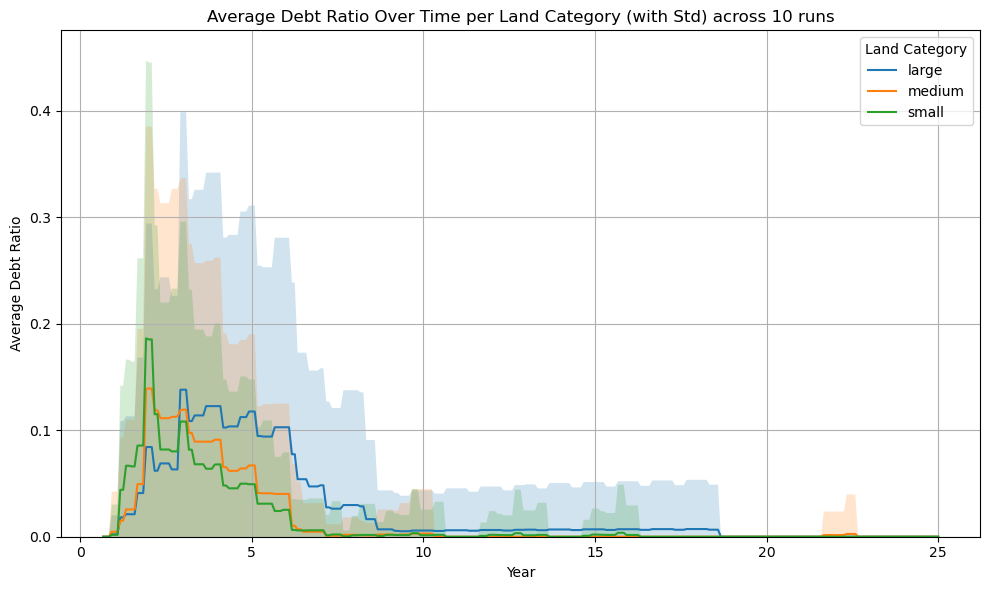

In [ ]:
debt_data = agent_data_all.copy()
debt_data = debt_data[debt_data['Debt ratio'].notna()]


grouped = (
    debt_data
    .groupby(['Step', 'Land_category'])['Debt ratio']
    .agg(['mean', 'std'])
    .reset_index()
)


grouped['Year'] = grouped['Step'] / 12

mean_pivot = grouped.pivot(index='Year', columns='Land_category', values='mean')
std_pivot = grouped.pivot(index='Year', columns='Land_category', values='std')


plt.figure(figsize=(10, 6))

for category in mean_pivot.columns:
    plt.plot(mean_pivot.index, mean_pivot[category], label=category)
    plt.fill_between(
        mean_pivot.index,
        mean_pivot[category] - std_pivot[category],
        mean_pivot[category] + std_pivot[category],
        alpha=0.2
    )

plt.title("Average Debt Ratio Over Time per Land Category (with Std) across 10 runs")
plt.xlabel("Year")
plt.ylabel("Average Debt Ratio")
plt.ylim(bottom=0)
plt.legend(title="Land Category")
plt.grid(True)
plt.tight_layout()
plt.show()


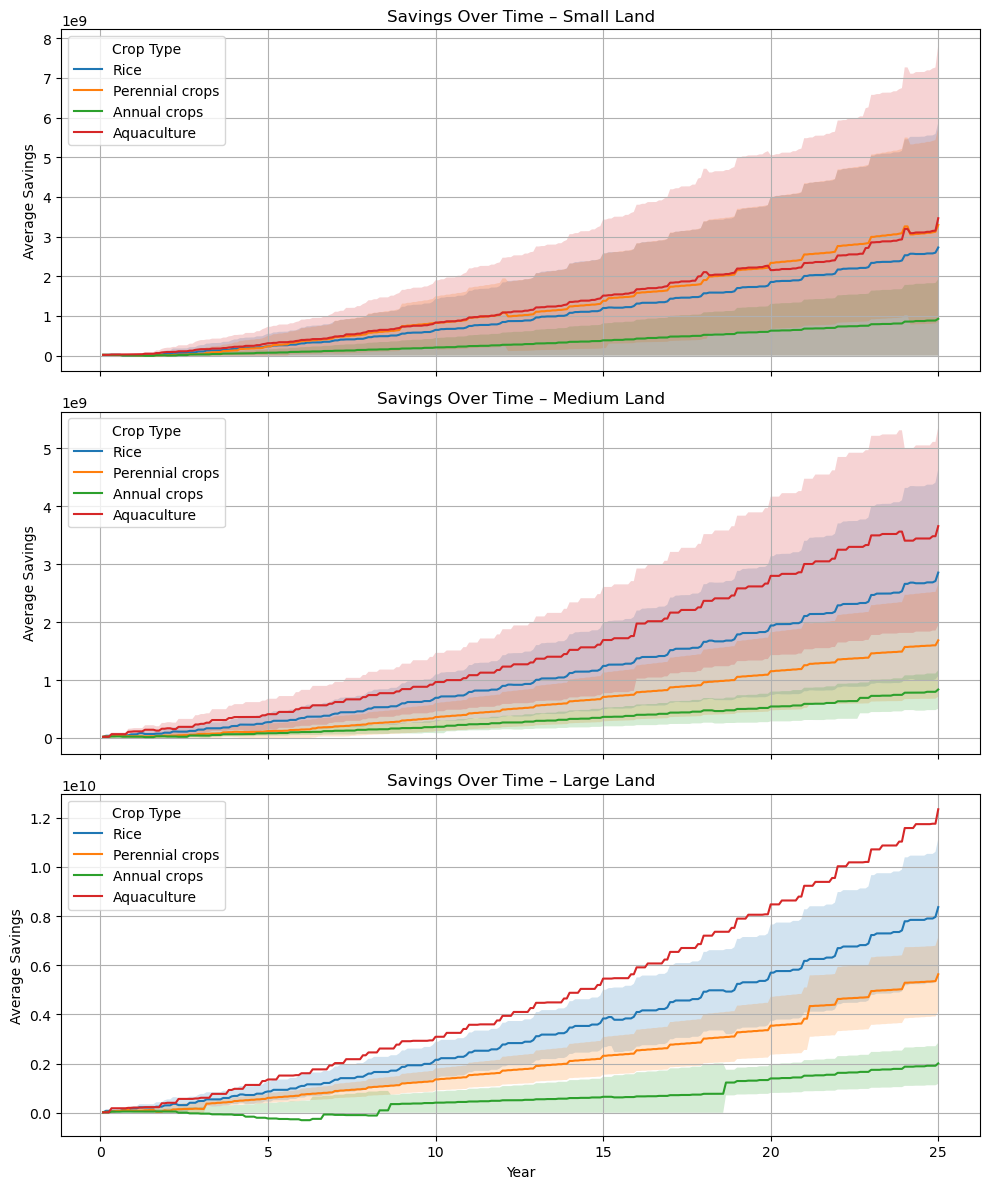

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_savings = agent_data_all.copy()  
df_filtered = df_savings.dropna(subset=['Crop_type', 'Land_category', 'Savings'])

df_filtered['Year'] = df_filtered['Step'] / 12


land_categories = ['small', 'medium', 'large']
crop_types = ['Rice', 'Perennial crops', 'Annual crops', 'Aquaculture']


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

for i, land in enumerate(land_categories):
    ax = axes[i]
    df_land = df_filtered[df_filtered['Land_category'] == land]
    
    for crop in crop_types:
        df_crop = df_land[df_land['Crop_type'] == crop]
        if df_crop.empty:
            continue

        grouped = df_crop.groupby('Year')['Savings']
        mean = grouped.mean()
        std = grouped.std()

        
        ax.plot(mean.index, mean.values, label=crop)
        ax.fill_between(
            mean.index,
            np.maximum(0, mean - std),  
            mean + std,
            alpha=0.2
        )
    
    ax.set_title(f"Savings Over Time – {land.capitalize()} Land")
    ax.set_ylabel("Average Savings")
    ax.grid(True)
    ax.legend(title="Crop Type")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


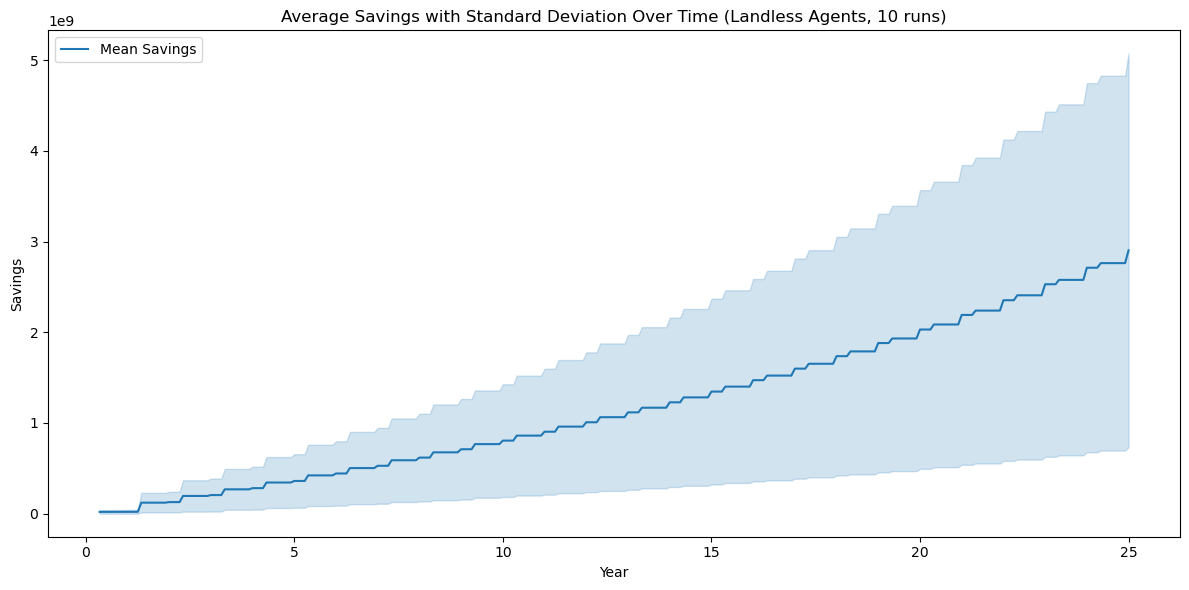

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

agent_data_all = pd.concat(all_runs, ignore_index=True)

landless_savings = agent_data_all[agent_data_all['too low income'].notna()].copy()
landless_savings['Year'] = landless_savings['Step'] / 12

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=landless_savings,
    x="Year",
    y="Savings",
    estimator='mean',    
    ci='sd',             
    label="Mean Savings"
)

plt.title("Average Savings with Standard Deviation Over Time (Landless Agents, 10 runs)")
plt.xlabel("Year")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()
